In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("../data/processed/forbes_definitive.csv")

In [74]:
df

,Unnamed: 0,id,worth (BUSD),worthChage (millions USD),realTimePosition,name,position,area,source,age,gender,country
0,0,3033,112.0,0.000,1,Jeff Bezos,1,Technology,Amazon,55.0,M,United States
1,1,3381,90.0,-0.001,2,Bill Gates,2,Technology,Microsoft,64.0,M,United States
2,2,2949,84.0,-0.002,3,Warren Buffett,3,Finance and Investments,Berkshire Hathaway,89.0,M,United States
3,3,7380,72.0,0.000,4,Bernard Arnault,4,Fashion & Retail,LVMH,70.0,M,France
4,4,6568,71.0,0.000,5,Mark Zuckerberg,5,Technology,Facebook,35.0,M,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2208,9856,1.0,0.000,2134,Zhao Xiaoqiang,2204,Fashion & Retail,"fashion, entertainment",52.0,M,China
2209,2209,5033,1.0,NaN,2134,Zhou Liangzhang,2205,Manufacturing,electrical equipment,57.0,M,China
2210,2210,6612,1.0,0.000,1856,Zhu Xingming,2206,Manufacturing,electrical equipment,52.0,M,China
2211,2211,8969,1.0,0.000,1978,Zhuo Jun,2207,Manufacturing,printed circuit boards,54.0,F,Hong Kong


In [75]:
df[["country", "gender"]].groupby(["gender"]).count()

,country
gender,
F,222
M,1831


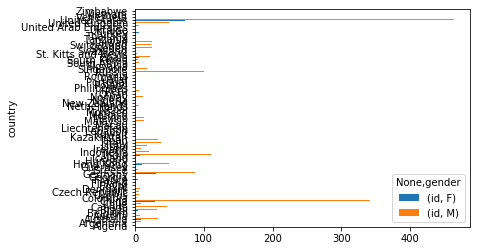

In [76]:
df.groupby(["country", "gender"]).count()[["id"]].unstack(level="gender").plot.barh()

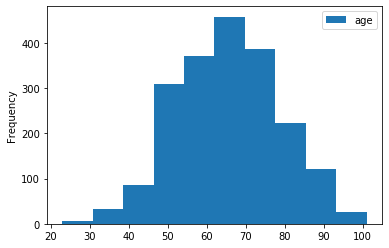

In [77]:
df[["age"]].plot.hist(10)

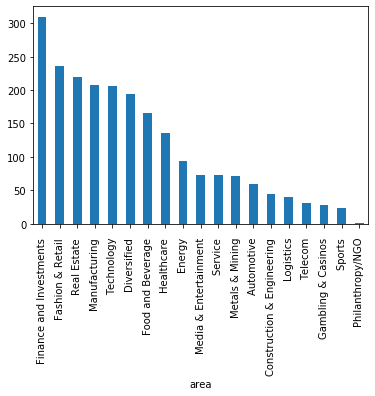

In [78]:
df.groupby("area").count().sort_values(by = "id", ascending=False).id.plot.bar()

In [29]:
df_econ = pd.read_csv("../data/processed/economic_values.csv", index_col = 0)

In [30]:
df_econ = df_econ.reset_index().drop("index", axis = 1)

In [43]:
df.head(2)

,Unnamed: 0,id,worth (BUSD),worthChage (millions USD),realTimePosition,name,position,area,source,age,gender,country
0,0,3033,112.0,0.000,1,Jeff Bezos,1,Technology,Amazon,55.0,M,United States
1,1,3381,90.0,-0.001,2,Bill Gates,2,Technology,Microsoft,64.0,M,United States


In [79]:
df_econ

,Annual GDP [+],GDP per capita [+],Country
0,"330,974M.$","6,642$",Colombia
1,"191,362M.$","68,794$",Qatar
2,"240,901M.$","23,437$",Portugal
3,"705,501M.$","82,589$",Switzerland
4,"1,427,533M.$","30,733$",Spain
5,"771,274M.$","9,405$",Turkey
6,"56,852M.$","1,009$",Tanzania
7,"330,910M.$","3,103$",Philippines
8,"1,022,454M.$","3,871$",Indonesia
9,"532,268M.$","46,696$",Belgium


In [44]:
d = df.groupby("country").count()[["id", "worth (BUSD)"]].merge(df_econ, left_on = ["country"], right_on = ["Country"])

In [59]:
d["Annual GDP [+]"].str.replace(",", "").str[:-3]

0       519487
1      1420045
2       456166
3       532268
4      1867818
5      1712479
6       298180
7     13368073
8       330974
9        24493
10      245226
11      352058
12      249559
13      274210
14     2780152
15     3951340
16      362721
17     2718732
18     1022454
19      382754
20      370588
21     2075856
22     4971767
23      172941
24       56639
25        6296
26      358579
27     1222053
28        6401
29      118534
30      914519
31      203127
32      398186
33      434167
34      225366
35      330910
36      585816
37      240901
38      191362
39      239552
40     1657290
41      364139
42      368135
43     1720489
44     1427533
45      556073
46      705501
47      589906
48       56852
49      504928
50      771274
51      130857
52      414179
53     2828833
54    20580200
55       98437
Name: Annual GDP [+], dtype: object

In [62]:
d["%GDP"] = (d["worth (BUSD)"]*1000000000)/(d["Annual GDP [+]"].str.replace(",", "").str[:-3].astype("int64")*1000000)*100

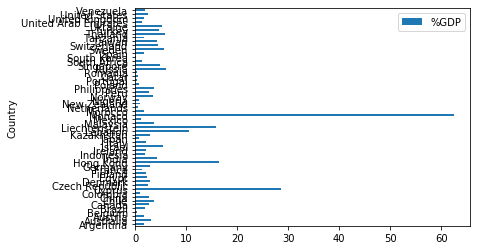

In [71]:
d.plot.barh(x="Country", y="%GDP")